## Data Preparation

In [2]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# set random seed to ensure that results are repeatable
np.random.seed(1)

### Load data 

In [3]:
# load data
mc = pd.read_csv("Mall_Customers.csv")
mc.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


### EDA

In [4]:
# generate a basic summary of the data
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
import summarytools
from summarytools import dfSummary
dfSummary(mc)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CustomerID[int64],Mean (sd) : 100.5 (57.9)min < med < max:1.0 < 100.5 < 200.0IQR (CV) : 99.5 (1.7),200 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Gender[object],1. Female2. Male,112 (56.0%)88 (44.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQWqDQByF8TdFQrOZQQQP4yF62B5ibiPiLJqQjV1kE+K280bs9zvBH/kQEnxh2zYBDkHSVdKl9SEn9di27db6iKPohmH4ijH2rQ85o1LKEkL4JrinLsbYT9N0SyndWx9zJuu6fuac+3meL5KITVInSSml+ziOP62POaFr6wOO5KP1Afg/iA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssOmk54d+rQ85G57pXldKWXLOvfjQ78+VUhZJj9Z3HAWDl7oYvLwITPngwpttj7dRJUz53jC/q4cp3wvmd3Ux5dvjV3kl/KkLG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yY8r3gOdTFlO8N87t6GLzsMXip5BcKW2rfwvGDvwAAAABJRU5ErkJggg=="">",0(0.0%)
3,Age[int64],Mean (sd) : 38.9 (14.0)min < med < max:18.0 < 36.0 < 70.0IQR (CV) : 20.2 (2.8),51 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3cTYriQBiA4a8mrUSFBBF05wUGZuHSQ8xh5wiz8ATewJ0gIWKmgzFmVt0wYPuTSk3qK95nX3YWL239xDJN0wjgu299PwDwjLe+H+AeY8xIRIYth5+bpnnv8nnQH29DNcaMZrPZzyRJpm3GH4/HzBjzi1jD4G2oIjJMkmS6Xq/f0zQtXxmY53m82Wymh8NhKCKEGgCfQxURkTRNy/l8/qfF0FHnD4PesJiCCoQKFR5+9bPyhg/uhsrKG7549B+VlTe88NSqn5U3+ub99lRbdV0PRCQxxrT9CObXHgky1KIoBlVV/Vgul1EURS9NWT4wv/ZLkKGez+e3OI7Hq9WqXCwW2avjmV/7J8hQP0wmk7ZzaxHm115hwx8qECpUCPqrvy+c5nWPUDvGaZ4bhNo9TvMcIFRHOM3rFospqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFDB6RGq5e+Wkuv1Ouj4kaCUs1Btf7dUVVVc1/X3six/i0jbt/QRCGeh2v5uabfbTbfb7fhyuUQung+6OH97qu3vlrIs4y0ifGIxBRUIFSrw4vQXLHYs2K1wgFBvsNmxYLfCDUK9wWbHwna3gjuzbiPUO9rsWNjsVnBn1tcI1SPa78xyeZ8BoXpI451Zru8zIFR0xel9BoSKTrm6z4ANf6hAqFCBUKECc9TAWB4YeHtYQKgBsT0w8PmwgFADYnNg0PdhwSOEGiCLAwNvX1ZnMQUVCBUqECpUIFSowGIKn3y+MIRQISL+XxhCqBAR/y8MIVT8w9cLQ1hMQQVChQqEChUIFSoQKlQgVKhAqFCBUKHCUxv+eZ7Hr37w6XSKRUSKooj3+/34f47X+re1Prft+Gf6+guRZMaxJPMCIgAAAABJRU5ErkJggg=="">",0(0.0%)
4,Annual Income (k$)[int64],Mean (sd) : 60.6 (26.3)min < med < max:15.0 < 61.5 < 137.0IQR (CV) : 36.5 (2.3),64 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACxUlEQVR4nO3dP2/aQBjH8d9BiMwfGSFUsrF0rNSBkRfRF9uX0IFXwNClU7ZIEQLFDcIYd2pVKpJgHy73XL6f/YiHr6pH5/PVlWUpIHStaz8AcI6baz9AU5xzXUm3Hj+xK8vy+VLPAz9Rhuqc647H4y9pmo7q/sZms1k5574SaxiiDFXSbZqmo/l8/jwcDrdVF6/X62SxWIweHx9vJRFqAGINVZI0HA63k8nkZ83l3Ys+DLxEHeq1eM7HzMYnEOqF+c7HzManEerl1Z6PmY1fRqgN8ZiPmY1PYMMfJhAqTCBUmECoMIFQYQKhwgS2p15QFEVHUuqcq7o0PRwOnQYe6V0j1BOyLOvkef55Op222+12pU37PM+Toig+bbfbb5LqnjPAPwj1hN1ud5MkSW82m23v7u5WVdbe39+Plstlb7/ft5t6vveIUF/R7/crv11arVa8WWpA0KF6nEJiToxMsKH6nEJiToxPsKHK4xQSc2J8Qg5VUr1TSMyJ8WHDHyYQKkwgVJjw5ozKh2oIwauh8qEaQvHWv6h8qIYgnLU9VfdDtaIoUtU7gSTxdgl/aWwf1ecEksTbJRxrLFSfE0gSb5dwrPE3U3VOIEm8XcIx9lFhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQmEChMIFSYQKkwg

In [6]:
# Check the missing values by summing the total na's for each variable
mc.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Clustering

In [7]:
X = mc.iloc[:,[3,4]].values

In [8]:
import scipy.cluster.hierarchy as sch

In [9]:
data =  sch.linkage(X, method ='ward')

<function matplotlib.pyplot.show(close=None, block=None)>

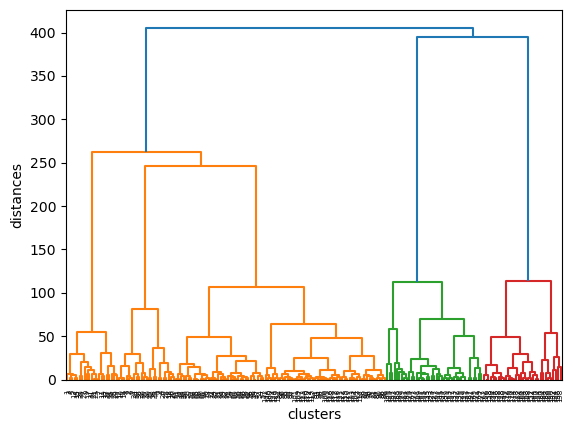

In [11]:
dendogram = sch.dendrogram(data)
plt.xlabel('clusters')
plt.ylabel('distances')
plt.show

## Model

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(X)

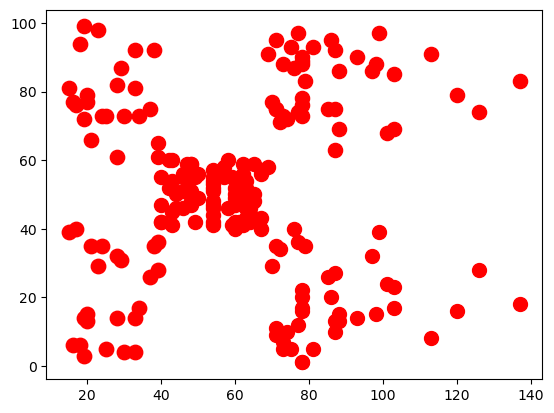

In [17]:
for i in range(0,5):
    plt.scatter(X[y_pred == i,0],X[y_pred == i,1], s= i*2+100, c= 'red' , label = 'cluster')
    plt.show